# DBSCAN Dissected Data

## Libraries and Configurations

Import configuration files

In [1]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../../config.ini")

['../../config.ini']

Import **data libraries**

In [2]:
import pandas as pd

Import **other libraries**

In [3]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7631579c3fd0>>

Custom helper scripts

In [4]:
%cd ../../
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning/dissected/

/home/bacci/COMPACT/notebooks
/home/bacci/COMPACT/notebooks/data_exploration_cleaning/dissected


## Import Data

In [5]:
# Combined dataframe
selected_dissected_csv = (
    config["DEFAULT"]["interim_path"] + "dissected/selected_dissected_df.csv"
)

In [6]:
selected_df = pd.read_csv(selected_dissected_csv, index_col=0)

In [7]:
selected_df

,Vendor Specific Tags,Length,DSSS_CCK,SM_Power_Save,Min_MPDCU_Start_Spacing,RX_Highest_Supported_Data_Rate,Extended_Channel_Switching,WNM_Sleep_Mode,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification,Label,MAC Address
0,62,111,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone7_F,1a:e6:5a:fe:34:4c
1,62,111,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone7_F,1a:e6:5a:fe:34:4c
2,62,111,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone7_F,1a:e6:5a:fe:34:4c
3,62,111,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone7_F,1a:e6:5a:fe:34:4c
4,62,111,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone7_F,1a:e6:5a:fe:34:4c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,25,182,0.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,XiaomiRedmiNote7_S,da:a1:19:00:17:f9
13940,25,182,0.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,XiaomiRedmiNote7_S,da:a1:19:1a:cc:8f
13941,25,143,0.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,XiaomiRedmiNote7_S,da:a1:19:41:c9:b1
13942,25,182,0.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,XiaomiRedmiNote7_S,da:a1:19:c7:24:b1


## Burst View

In [8]:
# This calculates statistics
selected_df.groupby(["MAC Address"]).describe()

Vendor Specific Tags                                         \
                                 count       mean       std   min   25%   50%   
MAC Address                                                                     
00:0f:00:6a:68:8b                 29.0   4.068966  11.14172   2.0   2.0   2.0   
00:be:3b:a2:a8:56               2324.0  54.000000   0.00000  54.0  54.0  54.0   
02:00:00:00:00:00                277.0  11.000000   0.00000  11.0  11.0  11.0   
02:00:00:00:3e:b2                  2.0  62.000000   0.00000  62.0  62.0  62.0   
02:00:3a:5e:a1:f4                  2.0  62.000000   0.00000  62.0  62.0  62.0   
...                                ...        ...       ...   ...   ...   ...   
fe:f9:ac:47:0d:b7                  2.0  62.000000   0.00000  62.0  62.0  62.0   
fe:f9:fc:fb:83:9e                 19.0   1.000000   0.00000   1.0   1.0   1.0   
fe:fc:07:34:10:69                  2.0  62.000000   0.00000  62.0  62.0  62.0   
fe:fc:aa:d1:89:d1                  2.0  62.000000   0.00000  62.0  62.0  62.0   
fe:ff:ff:0f:64:5d                  2.0  62.000000   0.00000  62.0  62.0  62.0   

                               Length              ... WNM_Notification       \
                    75%   max   count        mean  ...              75%  max   
MAC Address                                        ...                         
00:0f:00:6a:68:8b   2.0  62.0    29.0  271.241379  ...              0.0  0.0   
00:be:3b:a2:a8:56  54.0  54.0  2324.0  151.661790  ...              1.0  1.0   
02:00:00:00:00:00  11.0  11.0   277.0  121.743682  ...              0.0  0.0   
02:00:00:00:3e:b2  62.0  62.0     2.0  132.000000  ...              0.0  0.0   
02:00:3a:5e:a1:f4  62.0  62.0     2.0  132.000000  ...              0.0  0.0   
...                 ...   ...     ...         ...  ...              ...  ...   
fe:f9:ac:47:0d:b7  62.0  62.0     2.0  131.000000  ...              0.0  0.0   
fe:f9:fc:fb:83:9e   1.0   1.0    19.0  154.736842  ...              0.0  0.0   
fe:fc:07:34:10:69  62.0  62.0     2.0  132.000000  ...              0.0  0.0   
fe:fc:aa:d1:89:d1  62.0  62.0     2.0  143.000000  ...              0.0  0.0   
fe:ff:ff:0f:64:5d  62.0  62.0     2.0  132.000000  ...              0.0  0.0   

                  Operating_Mode_Notification                                \
                                        count mean  std  min  25%  50%  75%   
MAC Address                                                                   
00:0f:00:6a:68:8b                        28.0  0.0  0.0  0.0  0.0  0.0  0.0   
00:be:3b:a2:a8:56                       240.0  1.0  0.0  1.0  1.0  1.0  1.0   
02:00:00:00:00:00                       277.0  1.0  0.0  1.0  1.0  1.0  1.0   
02:00:00:00:3e:b2                         2.0  1.0  0.0  1.0  1.0  1.0  1.0   
02:00:3a:5e:a1:f4                         2.0  1.0  0.0  1.0  1.0  1.0  1.0   
...                                       ...  ...  ...  ...  ...  ...  ...   
fe:f9:ac:47:0d:b7                         2.0  1.0  0.0  1.0  1.0  1.0  1.0   
fe:f9:fc:fb:83:9e                        19.0  1.0  0.0  1.0  1.0  1.0  1.0   
fe:fc:07:34:10:69                         2.0  1.0  0.0  1.0  1.0  1.0  1.0   
fe:fc:aa:d1:89:d1                         2.0  1.0  0.0  1.0  1.0  1.0  1.0   
fe:ff:ff:0f:64:5d                         2.0  1.0  0.0  1.0  1.0  1.0  1.0   

                        
                   max  
MAC Address             
00:0f:00:6a:68:8b  0.0  
00:be:3b:a2:a8:56  1.0  
02:00:00:00:00:00  1.0  
02:00:00:00:3e:b2  1.0  
02:00:3a:5e:a1:f4  1.0  
...                ...  
fe:f9:ac:47:0d:b7  1.0  
fe:f9:fc:fb:83:9e  1.0  
fe:fc:07:34:10:69  1.0  
fe:fc:aa:d1:89:d1  1.0  
fe:ff:ff:0f:64:5d  1.0  

[4415 rows x 104 columns]

Use the mode value for each column, within a single group.

In [9]:
burst_df = selected_df.groupby("MAC Address").agg(pd.Series.mode).reset_index()

In [10]:
burst_df

,MAC Address,Vendor Specific Tags,Length,DSSS_CCK,SM_Power_Save,Min_MPDCU_Start_Spacing,RX_Highest_Supported_Data_Rate,Extended_Channel_Switching,WNM_Sleep_Mode,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification,Label
0,00:0f:00:6a:68:8b,2,279,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SamsungJ6_K
1,00:be:3b:a2:a8:56,54,153,0.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,HuaweiP20_G
2,02:00:00:00:00:00,11,123,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SamsungM31_A
3,02:00:00:00:3e:b2,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4,02:00:3a:5e:a1:f4,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,fe:f9:ac:47:0d:b7,62,131,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
4411,fe:f9:fc:fb:83:9e,1,156,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone6_N
4412,fe:fc:07:34:10:69,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4413,fe:fc:aa:d1:89:d1,62,143,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W


Let's check how many bursts did each device produce

<Axes: xlabel='Label'>

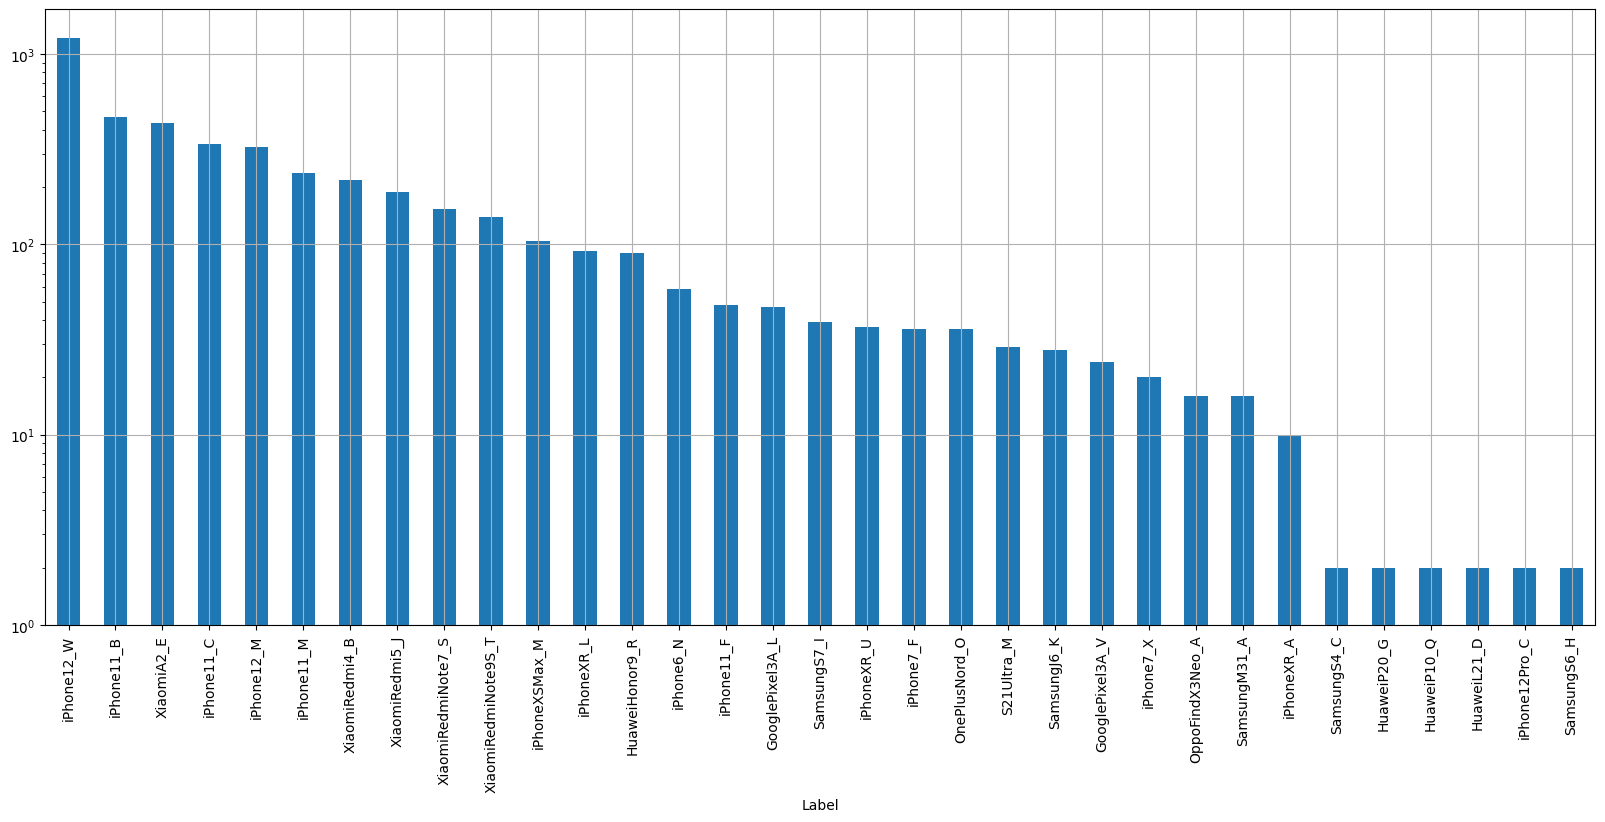

In [11]:
burst_df["Label"].value_counts().plot(kind="bar", figsize=(20, 8), grid=True, log=True)

From this we see that some devices did not perform randomization at all and for this reason, we can discard them.

In [12]:
label_count = burst_df["Label"].value_counts()
devices_to_drop = label_count[label_count == 1].index.tolist()

The devices that did not perform randomization and will be dropped are:

In [13]:
devices_to_drop

['SamsungS4_C',
 'HuaweiP20_G',
 'HuaweiP10_Q',
 'HuaweiL21_D',
 'iPhone12Pro_C',
 'SamsungS6_H']

In [14]:
burst_df = burst_df[~burst_df["Label"].isin(devices_to_drop)]

<Axes: xlabel='Label'>

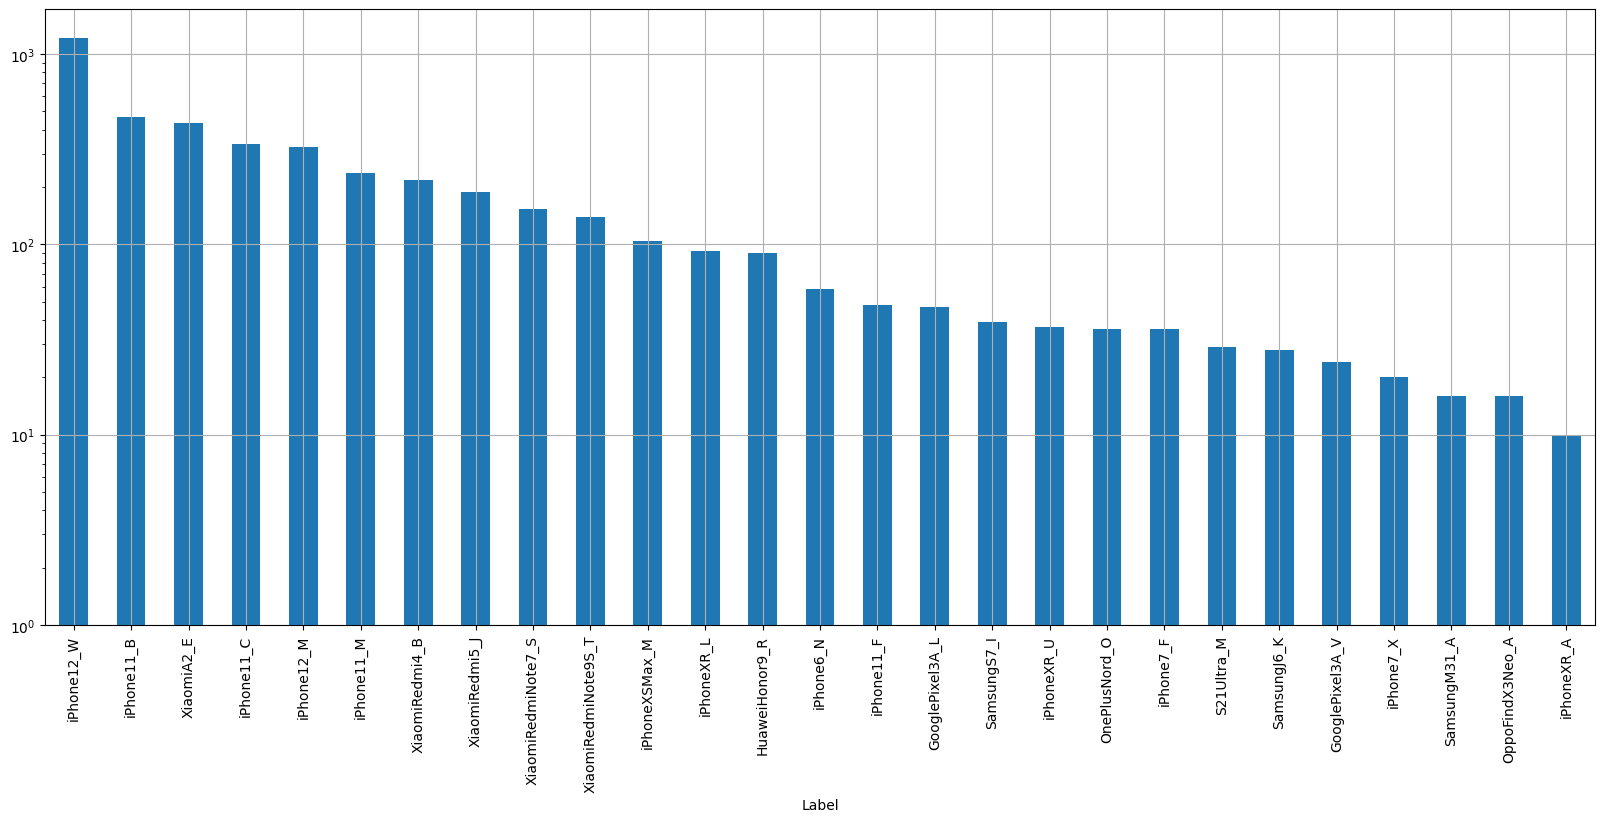

In [15]:
burst_df["Label"].value_counts().plot(kind="bar", figsize=(20, 8), grid=True, log=True)

Let's check how many devices we are left with

In [16]:
print("Number of devices left:", burst_df["Label"].nunique())

Number of devices left: 27


### Saving `burst_df`

In [17]:
burst_df.to_csv(
    config["DEFAULT"]["interim_path"] + "/dissected/selected_burst_dissected_df.csv"
)

## Dissected All Features

We want the same burst view, but also for the dataset considering all the non-zero-std dissected features, not just the RF selected ones. For this reason, we are replicating what did above, changing only the input file.

In [18]:
std_dissected_csv = (
    config["DEFAULT"]["interim_path"] + "dissected/std_dissected_df_raw.csv"
)

In [19]:
std_dissected_df = pd.read_csv(std_dissected_csv, index_col=0)

In [20]:
std_dissected_df

,MAC Address,Channel,DS Channel,Vendor Specific Tags,Length,Label,Supported Rates 1,Supported Rates 2,Supported Rates 3,Supported Rates 4,...,TIM_Broadcast,BSS_Transition,Multiple_BSSID,Timing_Measurement,SSID_List,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification
0,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1a:e6:5a:fe:34:4c,11,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1a:e6:5a:fe:34:4c,1,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1a:e6:5a:fe:34:4c,11,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,da:a1:19:00:17:f9,6,1.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13940,da:a1:19:1a:cc:8f,6,8.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13941,da:a1:19:41:c9:b1,11,5.0,0050f208002400,143,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13942,da:a1:19:c7:24:b1,1,3.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


Get dataframe statistics to check std, min and max values of columns

In [21]:
# This calculates statistics
# std_dissected_df.groupby(["MAC Address"]).describe()

Use the mode value within a single group as column value

In [22]:
std_burst_df = std_dissected_df.groupby("MAC Address").agg(pd.Series.mode).reset_index()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 std_burst_df = std_dissected_df.groupby("MAC Address").agg(pd.Series.mode).reset_index()     │
│   2                                                                                              │
│                                                                                                  │
│ /home/bacci/COMPACT/.venv/lib/python3.11/site-packages/pandas/core/groupby/generic.py:1482 in    │
│ aggregate                                                                                        │
│                                                                                                  │
│   1479 │   │   │   │   # try to treat as if we are passing a list                                │
│   1480 │   │   │   │   gba = GroupByApply(self, [func], args=(), kwargs={})                      │
│   1481 │   │   │   │   try:                                                                      │
│ ❱ 1482 │   │   │   │   │   result = gba.agg()                                                    │
│   1483 │   │   │   │                                                                             │
│   1484 │   │   │   │   except ValueError as err:                                                 │
│   1485 │   │   │   │   │   if "No objects to concatenate" not in str(err):                       │
│                                                                                                  │
│ /home/bacci/COMPACT/.venv/lib/python3.11/site-packages/pandas/core/apply.py:193 in agg           │
│                                                                                                  │
│    190 │   │   │   return self.agg_dict_like()                                                   │
│    191 │   │   elif is_list_like(func):                                                          │
│    192 │   │   │   # we require a list, but not a 'str'                                          │
│ ❱  193 │   │   │   return self.agg_list_like()                                                   │
│    194 │   │                                                                                     │
│    195 │   │   if callable(func):                                                                │
│    196 │   │   │   f = com.get_cython_func(func)                                                 │
│                                                                                                  │
│ /home/bacci/COMPACT/.venv/lib/python3.11/site-packages/pandas/core/apply.py:326 in agg_list_like │
│                                                                                                  │
│    323 │   │   -------                                                                           │
│    324 │   │   Result of aggregation.                                                            │
│    325 │   │   """                                                                               │
│ ❱  326 │   │   return self.agg_or_apply_list_like(op_name="agg")                                 │
│    327 │                                                                                         │
│    328 │   def compute_list_like(                                                                │
│    329 │   │   self,                                                                             │
│                                                                                                  │
│ /home/bacci/COMPACT/.venv/lib/python3.11/site-packages/pandas/core/apply.py:1571 in              │
│ agg_or_apply_list_like                                                                           │
│                                                            

In [ ]:
std_burst_df

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 std_burst_df                                                                                 │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'std_burst_df' is not defined

Remove single-burst devices

In [ ]:
std_burst_df = std_burst_df[~std_burst_df["Label"].isin(devices_to_drop)]

Saving the DataFrame to csv

In [ ]:
std_burst_df.to_csv(
    config["DEFAULT"]["interim_path"] + "/dissected/std_burst_dissected_df.csv"
)